<a href="https://colab.research.google.com/github/seenu-g/school_of_ai/blob/master/chap14/Overlap_and_mask_Trial(zipped).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [34]:
from google.colab import drive
drive.mount('/content/gdrive/')

Mounted at /content/gdrive/


In [0]:
!mkdir Overlay3

In [3]:
%cd Overlay3
!mkdir Fg-Bg
!mkdir Fg-Bg-Mask

/content/Overlay3


In [4]:
%cd ..

/content


In [12]:
from PIL import Image
folder = '/content/gdrive/My Drive/school_of_ai/chap14/'
bg = Image.open(folder + "Background/bg1.jpg")
print(bg.size)
fg = Image.open(folder +"Foreground/fg61.png")
print(fg.size)
masked = Image.open(folder +"Fg-Mask/mask61.jpg")
print(masked.size)

(224, 224)
(100, 150)
(100, 150)


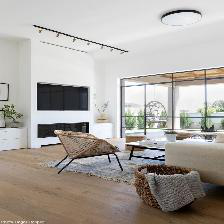

In [6]:
bg

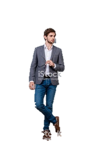

In [0]:
fg

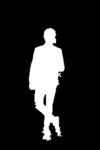

In [0]:
masked

In [0]:
import numpy as np
from PIL import Image
import random
import copy
import PIL

In [13]:
ls '/content/gdrive/My Drive/school_of_ai/chap14/'

 Background/                  Fg-Mask/
 DepthMapsTrial.ipynb         Foreground/
 DepthModel/                  Overlap_and_mask_Trial.ipynb
'Detectron2 Tutorial.ipynb'


In [14]:
folder = '/content/gdrive/My Drive/school_of_ai/chap14/'
outfile = open("/content/Overlay3/mapping.txt","a+")
start = 240001 # -----------------------You should choose your numbers----------------------------------
black = np.zeros((224,224))

for i in range(1,101): #1 background image  -------------This is 1-100 == Same for all -------------

    bg = Image.open(f'{folder}Background/bg{str(i)}.jpg')

    for j in  range(61,81): #1 foreground image  ---------------You should choose your numbers. Place only 20 images no flipped one-------
     
      fg = Image.open(f'{folder}Foreground/fg{str(j)}.png').convert('LA')
      mask = Image.open(f'{folder}Fg-Mask/mask{str(j)}.jpg').convert('LA')

      for k in range(1,21): #---------------------Randomly Placing 20 times(Same for all)--------------------------------
       
        r1 = random.randint(1, 120)
        r2 = random.randint(1, 120)
        bg1 = copy.deepcopy(bg)
        bg2 = copy.deepcopy(bg)
        fg1 = copy.deepcopy(fg)
        m1 = copy.deepcopy(mask)
        black_img1 = Image.fromarray(black,mode='1')
        black_img2 = Image.fromarray(black,mode='1')

        flipfg = fg1.transpose(PIL.Image.FLIP_LEFT_RIGHT) #flip image
        flipmask = m1.transpose(PIL.Image.FLIP_LEFT_RIGHT) #flip mask

        fg1.putalpha(255)
        bg1.paste(fg1,(r1,r2))
        flipfg.putalpha(255)
        bg2.paste(flipfg,(r1,r2))
        m1.putalpha(255)
        black_img1.paste(m1,(r1,r2))
        flipmask.putalpha(255)
        black_img2.paste(flipmask,(r1,r2))
            
        bg1.save(f"/content/Overlay3/Fg-Bg/fg-bg{str(start)}.jpg",optimize=True, quality=30)
        black_img1.save(f"/content/Overlay3/Fg-Bg-Mask/fg-bg-mask{str(start)}.jpg",optimize=True, quality=30) 
        outfile.write('bg' + str(i) +'.jpeg' + ' fg'+ str(j)+'.png' + ' mask'+ str(j)+'.jpg' + ' fg-bg' + str(start)+'.jpg' + ' fg-bg-mask' +str(start)+'.jpg' + '\n')
        start+=1
        
        bg2.save(f"/content/Overlay3/Fg-Bg/fg-bg{str(start)}.jpg",optimize=True, quality=30)
        black_img2.save(f"/content/Overlay3/Fg-Bg-Mask/fg-bg-mask{str(start)}.jpg",optimize=True, quality=30)
        outfile.write('bg' + str(i) +'.jpeg' + ' fg'+ str(j)+'.png' + ' mask'+ str(j)+'.jpg' + ' fg-bg' + str(start)+'.jpg' + ' fg-bg-mask' +str(start)+'.jpg'+ '\n')
        start+=1
        print(start)
        
outfile.close()

Streaming output truncated to the last 5000 lines.
310005
310007
310009
310011
310013
310015
310017
310019
310021
310023
310025
310027
310029
310031
310033
310035
310037
310039
310041
310043
310045
310047
310049
310051
310053
310055
310057
310059
310061
310063
310065
310067
310069
310071
310073
310075
310077
310079
310081
310083
310085
310087
310089
310091
310093
310095
310097
310099
310101
310103
310105
310107
310109
310111
310113
310115
310117
310119
310121
310123
310125
310127
310129
310131
310133
310135
310137
310139
310141
310143
310145
310147
310149
310151
310153
310155
310157
310159
310161
310163
310165
310167
310169
310171
310173
310175
310177
310179
310181
310183
310185
310187
310189
310191
310193
310195
310197
310199
310201
310203
310205
310207
310209
310211
310213
310215
310217
310219
310221
310223
310225
310227
310229
310231
310233
310235
310237
310239
310241
310243
310245
310247
310249
310251
310253
310255
310257
310259
310261
310263
310265
310267
310269
310271
310273
3102

In [20]:
!pwd

/content


In [16]:
! ls 'Overlay3/Fg-Bg/' | wc -l
! ls 'Overlay3/Fg-Bg-Mask/' | wc -l

80000
80000


In [18]:
import os
from pathlib import Path

list = os.listdir('Overlay3/Fg-Bg/') # dir is your directory path
number_files1 = len(list)
print('Overlay3/Fg-Bg/',number_files1)
list = os.listdir('Overlay3/Fg-Bg-Mask/') # dir is your directory path
number_files = len(list)
print('Overlay3/Fg-Bg-Mask/',number_files)
mapping_file = Path('Overlay3/mapping.txt')
if mapping_file.exists():
  number_of_lines = len(open('Overlay3/mapping.txt').readlines( ))
  print(number_of_lines)

Overlay3/Fg-Bg/ 80000
Overlay3/Fg-Bg-Mask/ 80000
80000


In [21]:
#Export Zip file
from zipfile import ZipFile 
import zipfile
import os 
  
def get_all_file_paths(directory): 
  
    # initializing empty file paths list 
    file_paths = [] 
  
    # crawling through directory and subdirectories 
    for root, directories, files in os.walk(directory): 
        for filename in files: 
            # join the two strings in order to form the full filepath. 
            filepath = os.path.join(root, filename) 
            file_paths.append(filepath) 
  
    # returning all file paths 
    return file_paths   

def main(): 
    # path to folder which needs to be zipped 
    directory = 'Overlay3'
  
    # calling function to get all file paths in the directory 
    file_paths = get_all_file_paths(directory) 
  
    # printing the list of all files to be zipped 
    print('Following files will be zipped:') 
    for file_name in file_paths: 
        print(file_name) 
  
    # writing files to a zipfile 
    with ZipFile('/content/gdrive/My Drive/school_of_ai/chap14/dataset_24to32k.zip','a', compression = zipfile.ZIP_DEFLATED) as zip: 
        # writing each file one by one 
        for file in file_paths: 
            zip.write(file) 
  
    print('All files zipped successfully!') 
main()

Streaming output truncated to the last 5000 lines.
Overlay3/Fg-Bg/fg-bg268923.jpg
Overlay3/Fg-Bg/fg-bg287881.jpg
Overlay3/Fg-Bg/fg-bg303677.jpg
Overlay3/Fg-Bg/fg-bg313051.jpg
Overlay3/Fg-Bg/fg-bg248262.jpg
Overlay3/Fg-Bg/fg-bg244228.jpg
Overlay3/Fg-Bg/fg-bg267347.jpg
Overlay3/Fg-Bg/fg-bg264163.jpg
Overlay3/Fg-Bg/fg-bg277931.jpg
Overlay3/Fg-Bg/fg-bg267010.jpg
Overlay3/Fg-Bg/fg-bg308187.jpg
Overlay3/Fg-Bg/fg-bg248521.jpg
Overlay3/Fg-Bg/fg-bg318428.jpg
Overlay3/Fg-Bg/fg-bg310596.jpg
Overlay3/Fg-Bg/fg-bg292585.jpg
Overlay3/Fg-Bg/fg-bg260573.jpg
Overlay3/Fg-Bg/fg-bg314351.jpg
Overlay3/Fg-Bg/fg-bg275852.jpg
Overlay3/Fg-Bg/fg-bg286986.jpg
Overlay3/Fg-Bg/fg-bg302382.jpg
Overlay3/Fg-Bg/fg-bg253073.jpg
Overlay3/Fg-Bg/fg-bg316635.jpg
Overlay3/Fg-Bg/fg-bg253337.jpg
Overlay3/Fg-Bg/fg-bg241630.jpg
Overlay3/Fg-Bg/fg-bg275799.jpg
Overlay3/Fg-Bg/fg-bg248020.jpg
Overlay3/Fg-Bg/fg-bg296006.jpg
Overlay3/Fg-Bg/fg-bg297936.jpg
Overlay3/Fg-Bg/fg-bg251463.jpg
Overlay3/Fg-Bg/fg-bg253942.jpg
Overlay3/Fg-Bg/fg-b

In [24]:
ls /content/Overlay3/

Fg-Bg/  Fg-Bg-Mask/  mapping.txt


In [0]:
# To extract a  file, this is for depth images. After zipping. Only to read images

#To import zip file
from zipfile import ZipFile 
  
# specifying the zip file name 
file_name = "/content/gdrive/My Drive/school_of_ai/chap14/dataset_24to32k.zip"
  
# opening the zip file in READ mode 
with ZipFile(file_name, 'r') as zip: 
    # printing all the contents of the zip file 
    #zip.printdir() 
  
    # extracting all the files 
    print('Extracting all the files now...') 
    zip.extractall() 
    print('Done!')

In [26]:
!ls

gdrive	Overlay3  sample_data


In [25]:
!ls Overlay3/Fg-Bg |wc - l
!ls Overlay3/Fg-Bg-Mask | wc -l

  80000   80000 1280000 -
wc: l: No such file or directory
  80000   80000 1280000 total
80000


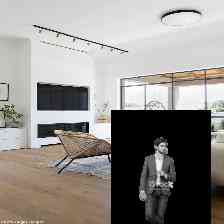

In [28]:
from IPython.display import Image as IMAGE
from PIL import Image,ImageOps
from google.colab.patches import cv2_imshow
src = Image.open("Overlay3/Fg-Bg/fg-bg240001.jpg")
src

In [29]:
import io
with ZipFile("/content/gdrive/My Drive/school_of_ai/chap14/dataset_24to32k.zip", 'r') as zip: 
  #zip.printdir()
  b = zip.read('Overlay3/Fg-Bg/fg-bg240001.jpg')
  #image_data = archive.read("image.png")
  print(b)
  fh = io.BytesIO(b)
  img = Image.open(fh)
  img = img.resize((672,672)) 
  img.save("/content/1.jpg")
  img

b'\xff\xd8\xff\xe0\x00\x10JFIF\x00\x01\x01\x00\x00\x01\x00\x01\x00\x00\xff\xdb\x00C\x00\x1b\x12\x14\x17\x14\x11\x1b\x17\x16\x17\x1e\x1c\x1b (B+(%%(Q:=0B`Ued_U][jx\x99\x81jq\x90s[]\x85\xb5\x86\x90\x9e\xa3\xab\xad\xabg\x80\xbc\xc9\xba\xa6\xc7\x99\xa8\xab\xa4\xff\xdb\x00C\x01\x1c\x1e\x1e(#(N++N\xa4n]n\xa4\xa4\xa4\xa4\xa4\xa4\xa4\xa4\xa4\xa4\xa4\xa4\xa4\xa4\xa4\xa4\xa4\xa4\xa4\xa4\xa4\xa4\xa4\xa4\xa4\xa4\xa4\xa4\xa4\xa4\xa4\xa4\xa4\xa4\xa4\xa4\xa4\xa4\xa4\xa4\xa4\xa4\xa4\xa4\xa4\xa4\xa4\xa4\xa4\xa4\xff\xc0\x00\x11\x08\x00\xe0\x00\xe0\x03\x01"\x00\x02\x11\x01\x03\x11\x01\xff\xc4\x00\x1a\x00\x00\x02\x03\x01\x01\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x01\x02\x03\x04\x05\x06\xff\xc4\x00D\x10\x00\x01\x04\x00\x04\x02\x06\x06\x08\x03\x06\x06\x03\x00\x00\x00\x01\x00\x02\x03\x11\x04\x12!1\x05Q\x13"Aaq\xb1\x142\x81\x91\xa1\xd1\x06\x15#4Br\xc1\xf03Rs$5DTb\xe1\x16CEc\xa3\xb2\x82\x92\x93\xff\xc4\x00\x17\x01\x01\x01\x01\x01\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x01\x02\x03\xff\xc4

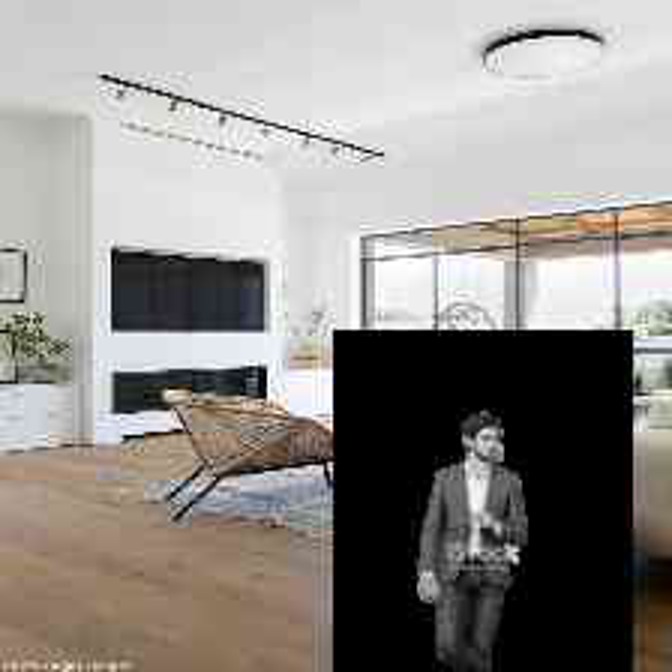

In [30]:
img

In [31]:
!cd '/content/gdrive/My Drive/school_of_ai/chap14/DepthModel'; python test.py --input '/content/1.jpg' --end 2

Using TensorFlow backend.
Loading model...

Model loaded (nyu.h5).

Loaded (1) images of size (672, 672, 3).
(336, 336, 3)
(336, 336)
(336, 336)
2
done


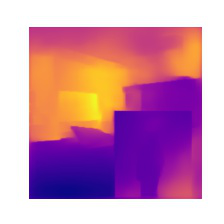

In [35]:
img = Image.open("/content/gdrive/My Drive/school_of_ai/chap14/DepthModel/output/test1.jpg")

img

In [0]:
'''for root, dirs,files in os.walk('/content/Overlay3/Fg-Bg-Mask'):
    if(files.count != 0): 
      for  file in files:
          os.remove(os.path.join(root, file))
for root, dirs,files in os.walk('/content/Overlay3/Fg-Bg'):
    if(files.count != 0): 
      for  file in files:
          os.remove(os.path.join(root, file))
from pathlib import Path
mapping_file = Path("/content/Overlay3/mapping.txt")
if mapping_file.exists():
   os.remove(os.path.join('/content/Overlay3', 'mapping.txt'))'''